In [32]:
#Importing necessary Liberaries to commence the Predictive Model with Python programming
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
#from kaggle.datasets import fetch_california_housing
#import plotly.express as px
#import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

In [2]:
#Loading the dataset "Finding Donors for Charity" retreived from kaggle.com
prediction_data=pd.read_csv("census.csv")

In [3]:
#The column named income is our target variable which we want to predict). 
#The two possible incomes are <= 50K (low-revenue) and > 50K (high-revenue). 
#The resulting prediction problem is therefore a binary classification problem, 
#while we will use the other columns as input variables for our model.

prediction_data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
#Displaying some features of the dataset.
prediction_data.head()

# Please note that "fnlwgt" (final weight) column that was crafted by the creators of the dataset 
# was removed by the author that worked on the dataset before us for simplicity

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
#Number of records on the dataset
n_records = prediction_data.shape[0]

#Records of individual's income above $50,000
n_greater_50k = prediction_data.query('income == ">50K"').shape[0]

# Records of individual's income upto $50,000
n_at_most_50k = prediction_data.query('income == "<=50K"').shape[0]

# Percentage of individual's income is above $50,000
greater_percent = (prediction_data.query('income == ">50K"').shape[0]/prediction_data.shape[0])*100

# Print the results
print("Number of records on the dataset: {}".format(n_records))
print("Records of individual's income above $50,000: {}".format(n_greater_50k))
print("Records of individual's income upto $50,000: {}".format(n_at_most_50k))
print("Percentage of individual's income is above $50,000: {:.2f}%".format(greater_percent))


Number of records on the dataset: 45222
Records of individual's income above $50,000: 11208
Records of individual's income upto $50,000: 34014
Percentage of individual's income is above $50,000: 24.78%


In [6]:
target_column = 'income'
prediction_data[target_column].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

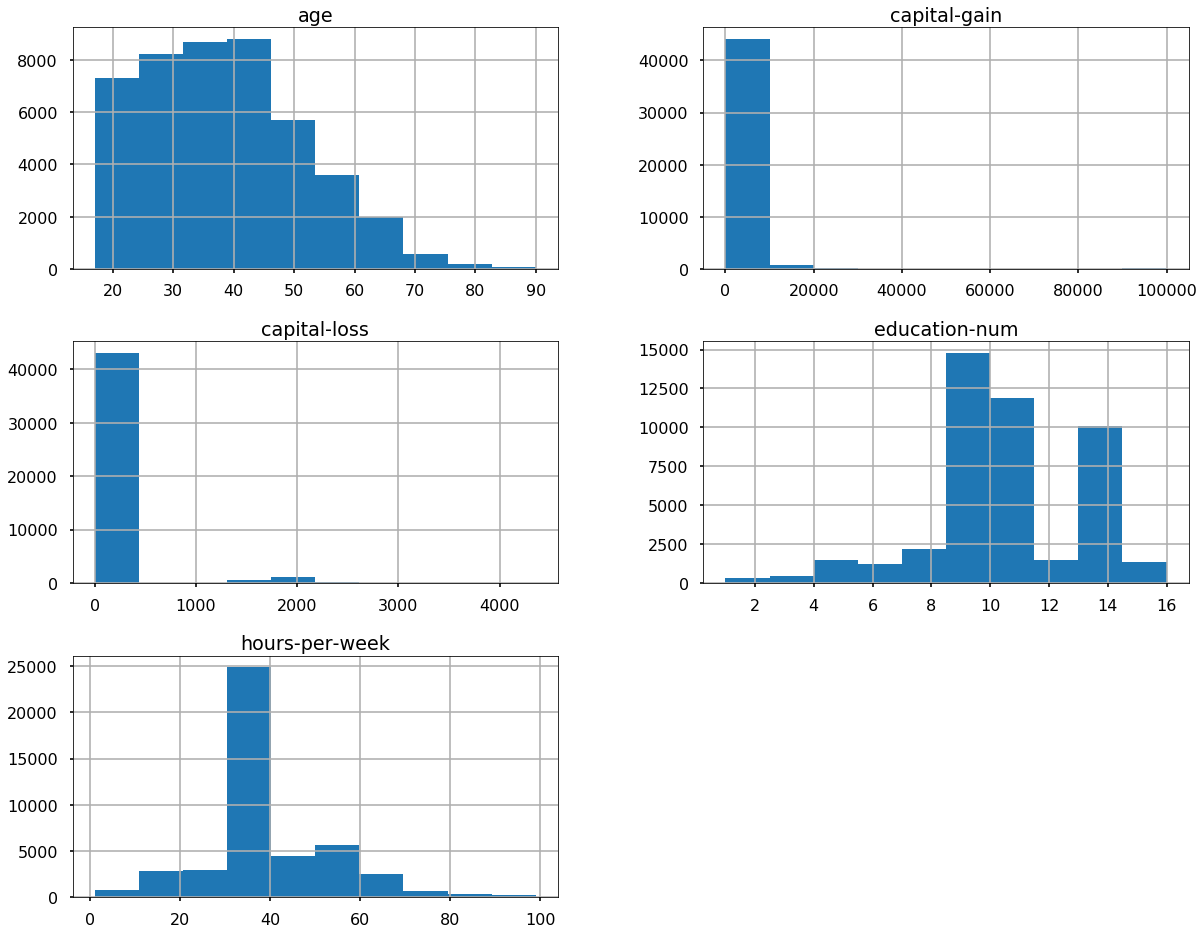

In [7]:
sns.set_context("poster")

_= prediction_data.hist(figsize=(20, 16))

In [8]:
prediction_data['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

In [9]:
prediction_data['education-num'].value_counts()

9.0     14783
10.0     9899
13.0     7570
14.0     2514
11.0     1959
7.0      1619
12.0     1507
6.0      1223
4.0       823
15.0      785
5.0       676
8.0       577
16.0      544
3.0       449
2.0       222
1.0        72
Name: education-num, dtype: int64

#Trying to plot n_sample of the dataset
n_samples = 5000
columns = ['age', 'education-num', 'hours-per-week']
_ = sns.pairplot(data=prediction_data[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 diag_kind='hist', diag_kws={'bins': 30})

In [10]:
#We can proceed to work on the variables and denominated features to build our predictive model.
#Before then, It is necessary to check how many samples are available in our dataset after separation of our target y.
#Note that the income column is no more in the list below.
prediction_data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
prediction_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [12]:
#Extractions of only Numerical features to build our first model

Numerics_only = prediction_data.select_dtypes(include=np.number)
Numerics_only.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


In [13]:
#Seperating our target y from the dataset
target_name = "income"
target = prediction_data[target_name]
target.head(10)

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object

In [14]:
#We deleted the income column since its our prediction target y in this work.
prediction_data = prediction_data.drop(columns=[target_name])
prediction_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [15]:
#Visualising the samples and features to use in building our predictive model
print(f"The new dataset after separation of our target contains {Numerics_only.shape[0]} samples and "
      f"{Numerics_only.shape[1]} features")

The new dataset after separation of our target contains 45222 samples and 5 features


In [16]:
Numerics_only.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [17]:
#Fiting a classification model using the “K-nearest neighbors” strategy. 
#This fit method is called to train the model from the input (features) and target data 
#using Kneighbour classifiers imported from sklearn libreries.
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
model.fit(Numerics_only, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
#Application of prediction model on only the Numerical features
#The model uses a prediction function that will use the input data together with the model states. 
#As for the learning algorithm and the model states, the prediction function is specific for each type of model.
target_predicted = model.predict(Numerics_only)

In [19]:
#Predicted new numerical features with the prediction model.
#Showing 10 predictions computed for simplicity.
target_predicted[:10]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K',
       '<=50K', '>50K', '>50K'], dtype=object)

In [20]:
#In comparing these predictions to the actual data on the dataset
target[:10]

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object

In [21]:
#Trying to confirm if the two datas agreed or not.
target[:20] == target_predicted[:20]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: income, dtype: bool

In [22]:
#Printing the comparism for better assessment.
print(f"Number of correct prediction: "
      f"{(target[:100] == target_predicted[:100]).sum()}/100")

Number of correct prediction: 89/100


In [23]:
#Shwing an average rate for better assessment
(target == target_predicted).mean()

0.842001680597939

In [24]:
#Loading the dataset for testing the model
#When building a machine learning model, it is important to evaluate the trained model on data 
#that was not used to fit it, as generalization is more than memorization (meaning we want a rule 
#that generalizes to new data, without comparing to data we memorized). It is harder to conclude 
#on never-seen instances than on already seen ones.
testing_data=pd.read_csv("census-test.csv")

In [25]:
target_test = testing_data[target_name]
data_test = testing_data.drop(columns=[target_name, ])
data_test.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [26]:
print(f"The testing dataset contains {data_test.shape[0]} samples and "
      f"{data_test.shape[1]} features")

The testing dataset contains 45222 samples and 13 features


In [27]:
prediction_data["native-country"].value_counts().sort_index()

 Cambodia                         26
 Canada                          163
 China                           113
 Columbia                         82
 Cuba                            133
 Dominican-Republic               97
 Ecuador                          43
 El-Salvador                     147
 England                         119
 France                           36
 Germany                         193
 Greece                           49
 Guatemala                        86
 Haiti                            69
 Holand-Netherlands                1
 Honduras                         19
 Hong                             28
 Hungary                          18
 India                           147
 Iran                             56
 Ireland                          36
 Italy                           100
 Jamaica                         103
 Japan                            89
 Laos                             21
 Mexico                          903
 Nicaragua                        48
 

In [28]:
#How can we easily recognize categorical columns among the dataset? 
#Part of the answer lies in the columns’ data type:
prediction_data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
dtype: object

In [29]:
#Sometimes, categorical columns could also be encoded with integers. 
#In such case, looking at the data type will not be enough. 
#In a previous notebook, we saw it is the case with the column "education-num".
prediction_data["education-num"].value_counts()

9.0     14783
10.0     9899
13.0     7570
14.0     2514
11.0     1959
7.0      1619
12.0     1507
6.0      1223
4.0       823
15.0      785
5.0       676
8.0       577
16.0      544
3.0       449
2.0       222
1.0        72
Name: education-num, dtype: int64

In [30]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

NameError: name 'selector' is not defined